# Load FIRE Data

In [122]:
# Import the main analysis module
import gizmo_analysis as gizmo

# Import ananke
import ananke as an

# Import matplotlib and numpy libraries
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Import libraries for plotting 
import vaex
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Import for inline image 
from PIL import Image
from IPython.display import display

In [19]:
# Check ananke version
an.__version__

'0.0.2.dev1'

In [20]:
# Choose the simulation directory
simulation_directory = '/Volumes/Haven/m12i_res7100'

In [21]:
# read star particles and gas cells at z = 0
# use particle_subsample_factor to periodically sub-sample particles, to save memory
#part = gizmo.io.Read.read_snapshots(['star', 'gas' ], 'redshift', 0, simulation_directory, particle_subsample_factor=10)
snap = 382
#part = gizmo.io.Read.read_snapshots(['star', 'gas' ], 'index', snap, simulation_directory, particle_subsample_factor=10)
part = gizmo.io.Read.read_snapshots(['star', 'dark'], 'index', snap, simulation_directory, particle_subsample_factor=10)


# in utilities.simulation.Snapshot():
* reading:  Volumes/Haven/m12i_res7100/snapshot_times.txt

  using snapshot index = 382, redshift = 0.499


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  Volumes/Haven/m12i_res7100/output/snapdir_382/snapshot_382.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 61795520 particles
    star      (id = 4): 8880905 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star', 'dark']

* reading particles from:
    snapshot_382.0.hdf5
    snapshot_382.1.hdf5
    snapshot_382.2.hdf5
    snapshot_382.3.hdf5

! cannot find MUSIC config file:  Volumes/Haven/m12i_res7100/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

* periodically subsampling all particles by factor = 10

* che

# Sample Image

In [22]:
# These are coordinates relative to the central galaxy
coordinates = part['star'].prop( 'host.distance' )

# This is distance to the center of the central galaxy
distance_to_center = part['star'].prop( 'host.distance.total' )

# An approximate definition for being in the galaxy: particles within 10 kpc of the center
is_in_galaxy = distance_to_center < 10.

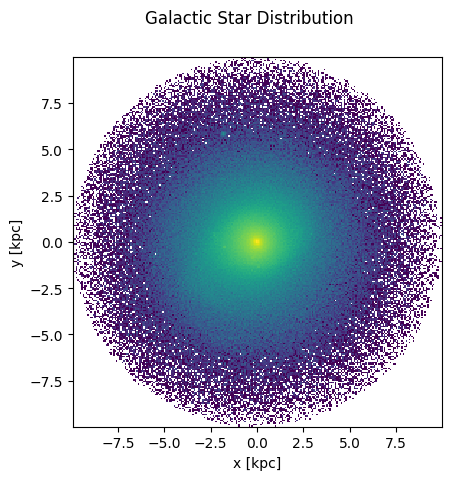

In [23]:
# Plot the logarithmically normalized count of the gas particles at each coordinate
fig = plt.figure()
ax = plt.gca()

# Use 2-D histogram
ax.hist2d(
    coordinates[:,0][is_in_galaxy],
    coordinates[:,1][is_in_galaxy],
    bins = 256,
    norm = matplotlib.colors.LogNorm(),
)

# Add labels, aspect ration, and title
ax.set_xlabel( r'x [kpc]' )
ax.set_ylabel( r'y [kpc]' )
ax.set_aspect( 'equal' )
fig.suptitle("Galactic Star Distribution");

In [24]:
# These are coordinates relative to the central galaxy
coordinates = part['dark'].prop( 'host.distance' )

# This is distance to the center of the central galaxy
distance_to_center = part['dark'].prop( 'host.distance.total' )

# An approximate definition for being in the galaxy: particles within 10 kpc of the center
is_in_galaxy = distance_to_center < 10.

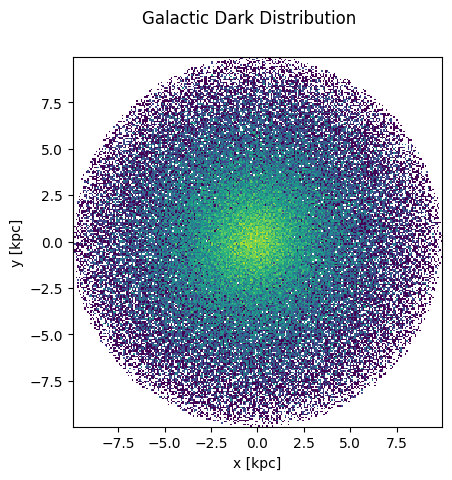

In [25]:
# Plot the logarithmically normalized count of the gas particles at each coordinate
fig = plt.figure()
ax = plt.gca()

# Use 2-D histogram
ax.hist2d(
    coordinates[:,0][is_in_galaxy],
    coordinates[:,1][is_in_galaxy],
    bins = 256,
    norm = matplotlib.colors.LogNorm(),
)

# Add labels, aspect ration, and title
ax.set_xlabel( r'x [kpc]' )
ax.set_ylabel( r'y [kpc]' )
ax.set_aspect( 'equal' )
fig.suptitle("Galactic Dark Distribution");

# Ananke

In [26]:
# Create p dictionary to store particle data
p = {}
p['pos3'] = part['star'].prop('host.distance')       # position in kpc
p['vel3'] = part['star'].prop('host.velocity')       # velocity in km/s
p['mass'] = part['star']['mass']                     # mass in solar masses
p['age'] = part['star'].prop('age')                  # log age in Gyr
p['feh'] = part['star'].prop('metallicity.fe')       # [Fe/H]
p['helium'] = part['star'].prop('metallicity.he')    # [He/H]
p['carbon'] = part['star'].prop('metallicity.c')     # [C/H]
p['nitrogen'] = part['star'].prop('metallicity.n')   # [N/H]
p['neon'] = part['star'].prop('metallicity.ne')      # [Ne/H]
p['magnesium'] = part['star'].prop('metallicity.mg') # [Mg/H]
p['silicon'] = part['star'].prop('metallicity.si')   # [Si/H]
p['sulphur'] = part['star'].prop('metallicity.s')    # [S/H]
p['calcium'] = part['star'].prop('metallicity.ca')   # [Ca/H]
p['oxygen'] = part['star'].prop('metallicity.o')     # [O/H]
p['alpha'] = part['star'].prop('metallicity.mg - metallicity.fe')          # [Mg/Fe]
p['parentid'] = part['star']['id']                   # indices of parent particles in snapshot
p['dform'] = np.zeros(part['star']['position'].shape[0], dtype='float32')  # dummy variable for now

In [27]:
# Run the ananke process with kword args
name='sim'
# ananke = an.Ananke(p, name, fsample=0.01, photo_sys='padova/LSST', cmd_magnames='rmag,gmag-rmag'
#                                             , app_mag_lim_lo=20, app_mag_lim_hi=24, abs_mag_lim_lo=-7.0, abs_mag_lim_hi=10.0
#                                             , color_lim_lo=-1000, color_lim_hi=1000, surveyArea=360, r_max=1000
#                                             , longitude=90, latitude=0)
ananke = an.Ananke(p, name, fsample=0.01, photo_sys='padova/LSST', cmd_magnames='rmag,gmag-rmag'
                                            , app_mag_lim_lo=17, app_mag_lim_hi=27.5, abs_mag_lim_lo=-7.0, abs_mag_lim_hi=10.0
                                            , color_lim_lo=-1000, color_lim_hi=1000, r_max=1000)
ananke.run()

Dimensions = 3
Normalization constant of Kernel type 3: 0.596831
Reading ASCII format file: to_enbid 
Read 2664273 records
Allocated 33.878 MByte for particle storage.
Type = 1 Particles = 888091
Total particles = 888091
Allocated 196.492 MByte for Binary-Tree and Entropy bins.

Scaling Co-ordinates as x[i]=x[i]/h[i] with h[i]->
1 1 1 

Starting to Build Tree .......
Particle Type = 1 First node number = 1
                  Last node number  = 1776181
Total number of nodes = 1776181
Treebuild time = 2.06722 s 

Density Calculation. Smoothing .....
Evaluated =   0 % Time Left = 26.002141 s of 26.264791 s Par no = 234824 Density = 3.236644e+00 
Evaluated =   1 % Time Left = 27.496939 s of 28.058075 s Par no = 266857 Density = 4.633850e+01 
Evaluated =   2 % Time Left = 30.923694 s of 31.880033 s Par no = 34317 Density = 3.469008e+05 
Evaluated =   3 % Time Left = 31.943292 s of 33.274160 s Par no = 386580 Density = 1.112000e+04 
Evaluated =   4 % Time Left = 32.060828 s of 33.748098 s Pa

Evaluated =  79 % Time Left = 7.218908 s of 36.079953 s Par no = 379591 Density = 7.090216e+03 
Evaluated =  80 % Time Left = 6.875269 s of 36.170038 s Par no = 416777 Density = 7.363243e+03 
Evaluated =  81 % Time Left = 6.518500 s of 36.197216 s Par no = 643692 Density = 8.484534e+01 
Evaluated =  82 % Time Left = 6.158308 s of 36.207467 s Par no = 795531 Density = 3.230668e+03 
Evaluated =  83 % Time Left = 5.804199 s of 36.256991 s Par no = 815635 Density = 8.664352e+02 
Evaluated =  84 % Time Left = 5.446669 s of 36.290330 s Par no = 140403 Density = 3.020133e+04 
Evaluated =  85 % Time Left = 5.094293 s of 36.365211 s Par no = 34690 Density = 4.408083e+05 
Evaluated =  86 % Time Left = 4.738653 s of 36.426511 s Par no = 879772 Density = 6.524641e+02 
Evaluated =  87 % Time Left = 4.380178 s of 36.474419 s Par no = 614416 Density = 3.731116e+03 
Evaluated =  88 % Time Left = 4.015178 s of 36.471754 s Par no = 45813 Density = 3.028581e-03 
Evaluated =  89 % Time Left = 3.653786 s o

Evaluated =  57 % Time Left = 14.820856 s of 35.282855 s Par no = 105029 Density = 2.158722e-03 
Evaluated =  58 % Time Left = 14.455064 s of 35.251153 s Par no = 158439 Density = 1.713680e-02 
Evaluated =  59 % Time Left = 14.108792 s of 35.266659 s Par no = 318247 Density = 9.427955e-03 
Evaluated =  60 % Time Left = 13.755756 s of 35.265618 s Par no = 428262 Density = 8.832810e-03 
Evaluated =  61 % Time Left = 13.412972 s of 35.291498 s Par no = 811672 Density = 4.055890e-03 
Evaluated =  62 % Time Left = 13.058974 s of 35.288476 s Par no = 34502 Density = 5.298135e-03 
Evaluated =  63 % Time Left = 12.701346 s of 35.275202 s Par no = 486688 Density = 9.387243e-03 
Evaluated =  64 % Time Left = 12.351394 s of 35.283095 s Par no = 304995 Density = 1.906801e-03 
Evaluated =  65 % Time Left = 12.010777 s of 35.318907 s Par no = 700046 Density = 1.805827e-03 
Evaluated =  66 % Time Left = 11.674316 s of 35.369476 s Par no = 547267 Density = 3.223997e-03 
Evaluated =  67 % Time Left = 1

nbody1/sim/

	1	1

path nbody1/sim/ sats 1 x[0] 1


Using geometry:                     All Sky
setting center to 0 0 0 0 0 0
Reading Isochrones from dir-        /opt/anaconda3/envs/ananke_env/.cache/Galaxia_ananke/GalaxiaData/Isochrones/padova/LSST
Isochrone Grid Size:                (Age bins=71,Feh bins=34,Alpha bins=1)
Time Isochrone Reading              5.06169     
------------------------------
nbody1/sim/sim.ebf  Sat No=0
Particles=888091
Satellite Info
Particles=888091 Mass=5.04066e+09 0.379706
5054860 accepted  4945140 rejected Parts=140914 outof 155971
11610652 accepted  8389348 rejected Parts=281738 outof 316328
18713608 accepted  11286392 rejected Parts=422176 outof 479576
26000478 accepted  13999522 rejected Parts=563290 outof 638889
33251050 accepted  16748950 rejected Parts=702976 outof 802357
Total Stars=55457455 accepted=37216194 rejected=18241261
-----------Done---------------
Total stars written                 37216194                
30
File written-                       /Users/andreweden/Desktop/ANANKE/vera_rubin

#,age,alpha,dec,dmod,feh,glat,glon,grav,lsst_gmag,lsst_imag,lsst_rmag,lsst_umag,lsst_ymag,lsst_zmag,lum,mact,mtip,parentid,partid,px,py,pz,ra,rad,smass,teff,vx,vy,vz
0,0.18812336027622223,0.2679692804813385,-66.76644,9.29568651873881,0.001132069737650454,-16.891027,280.3702,3.9326115,9.076758,6.7080393,7.8481555,11.792369,5.911495,6.162874,-0.7031554,0.50963104,2.5163538,11486918,0,0.12453115731477737,-0.6805069446563721,-0.21006879210472107,124.32091,0.7229983459760091,0.5094551581633958,3.5331476,-167.5718536376953,33.50652313232422,124.18959045410156
1,0.18812336027622223,0.2679692804813385,-64.14433,9.318448050330465,0.001132069737650454,-16.787546,277.2982,3.9098928,9.54026,7.0225477,8.309245,12.222084,6.1260724,6.4152565,-0.79042906,0.44973183,2.5163538,11486918,1,0.08885754120628557,-0.6938126322505892,-0.2110193556655146,121.10407,0.7306167256265127,0.44973347858006624,3.5190332,-164.78027401763592,44.61019982398876,106.81792001922645
2,0.18812336027622223,0.2679692804813385,-73.55089,9.051465136449616,0.001132069737650454,-20.003609,286.73184,3.861106,10.585539,7.7381396,9.339398,13.186363,6.6259756,7.001069,-0.9890231,0.33498845,2.5163538,11486918,1,0.17478356027096068,-0.581408493318915,-0.22101396924136227,125.06449,0.6460900120294271,0.33494926766453403,3.4894187,-156.75306268835857,32.74973323459172,126.14253501266666
3,0.18812336027622223,0.2679692804813385,-65.0493,9.104559338253202,0.001132069737650454,-15.422509,279.20303,3.91407,9.451857,6.9623275,8.222213,12.140639,6.0846415,6.36618,-0.7737209,0.4608527,2.5163538,11486918,1,0.1020762883304698,-0.6300256408503375,-0.17607064801486166,125.992004,0.6620821322619853,0.4608126360903119,3.5217113,-180.09703606226026,47.45410299493005,123.20990361417599
4,0.18812336027622223,0.2679692804813385,-70.45532,9.196207380864138,0.001132069737650454,-14.586914,286.8374,3.8441935,10.959431,7.9959316,9.707984,13.525584,6.805705,7.2135315,-1.0595461,0.29972693,2.5163538,11486918,1,0.19359587812299422,-0.6397102904961304,-0.17393237617920593,139.54153,0.6906236973028087,0.30009463780064105,3.4793413,-160.64621310292634,36.73518780915628,127.05953125181588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"37,216,189",6.346304893493652,0.38170456886291504,58.78072,19.27491589808142,-2.2380590438842773,5.4756136,146.55656,4.1651583,9.136625,7.5474267,8.031209,11.41822,7.1703176,7.3073277,-1.1695153,0.16313851,0.1,44670382,1,-59.48216116241581,39.28606364964844,6.8333224344947965,63.180355,71.61156742544884,0.163309496968851,3.5990753,-98.36120906940197,-78.40953707740417,136.1580685644947
"37,216,190",6.346304893493652,0.38170456886291504,55.43214,19.773199461497104,-2.2380590438842773,59.547943,105.51109,4.2355776,7.4424963,6.284596,6.6332293,9.174347,6.028857,6.1200676,-0.6871117,0.365733,0.1,44670382,1,-12.209344584296389,43.992514689909,77.65582563338756,208.37094,90.08238839375342,0.3655307892559632,3.6489148,-103.62553051682303,-72.0254113270626,133.55497466008669
"37,216,191",6.346304893493652,0.38170456886291504,53.94958,20.628489458731217,-2.2380590438842773,20.87951,161.95903,4.27,6.2080436,5.3364015,5.5925593,7.500002,5.1692433,5.225738,-0.3119585,0.63336796,0.1,44670382,1,-118.65998980004943,38.64891307702492,47.60364149017523,101.51827,133.56660639736413,0.6334445874267688,3.6916873,-100.30610851889807,-62.14353772545611,136.56434150598133
"37,216,192",6.346304893493652,0.38170456886291504,84.81347,20.51450719782536,-2.2380590438842773,24.52452,127.91648,4.2558746,7.031451,5.9808106,6.2950196,8.605427,5.7576294,5.835699,-0.5697103,0.4365404,0.1,44670382,1,-70.8548554522126,90.96324007653374,52.60607276785121,73.835815,126.73642127830307,0.43640201842785464,3.6642067,-106.85860752169017,-74.7719622151082,122.17802384507223


# Survey

In [28]:
# Make a survey using LSST (outputted as vaex data structure)
survey = ananke._output
survey._vaex

#,age,alpha,dec,dmod,feh,glat,glon,grav,lsst_gmag,lsst_imag,lsst_rmag,lsst_umag,lsst_ymag,lsst_zmag,lum,mact,mtip,parentid,partid,px,py,pz,ra,rad,smass,teff,vx,vy,vz
0,0.18812336027622223,0.2679692804813385,-66.76644,9.29568651873881,0.001132069737650454,-16.891027,280.3702,3.9326115,9.076758,6.7080393,7.8481555,11.792369,5.911495,6.162874,-0.7031554,0.50963104,2.5163538,11486918,0,0.12453115731477737,-0.6805069446563721,-0.21006879210472107,124.32091,0.7229983459760091,0.5094551581633958,3.5331476,-167.5718536376953,33.50652313232422,124.18959045410156
1,0.18812336027622223,0.2679692804813385,-64.14433,9.318448050330465,0.001132069737650454,-16.787546,277.2982,3.9098928,9.54026,7.0225477,8.309245,12.222084,6.1260724,6.4152565,-0.79042906,0.44973183,2.5163538,11486918,1,0.08885754120628557,-0.6938126322505892,-0.2110193556655146,121.10407,0.7306167256265127,0.44973347858006624,3.5190332,-164.78027401763592,44.61019982398876,106.81792001922645
2,0.18812336027622223,0.2679692804813385,-73.55089,9.051465136449616,0.001132069737650454,-20.003609,286.73184,3.861106,10.585539,7.7381396,9.339398,13.186363,6.6259756,7.001069,-0.9890231,0.33498845,2.5163538,11486918,1,0.17478356027096068,-0.581408493318915,-0.22101396924136227,125.06449,0.6460900120294271,0.33494926766453403,3.4894187,-156.75306268835857,32.74973323459172,126.14253501266666
3,0.18812336027622223,0.2679692804813385,-65.0493,9.104559338253202,0.001132069737650454,-15.422509,279.20303,3.91407,9.451857,6.9623275,8.222213,12.140639,6.0846415,6.36618,-0.7737209,0.4608527,2.5163538,11486918,1,0.1020762883304698,-0.6300256408503375,-0.17607064801486166,125.992004,0.6620821322619853,0.4608126360903119,3.5217113,-180.09703606226026,47.45410299493005,123.20990361417599
4,0.18812336027622223,0.2679692804813385,-70.45532,9.196207380864138,0.001132069737650454,-14.586914,286.8374,3.8441935,10.959431,7.9959316,9.707984,13.525584,6.805705,7.2135315,-1.0595461,0.29972693,2.5163538,11486918,1,0.19359587812299422,-0.6397102904961304,-0.17393237617920593,139.54153,0.6906236973028087,0.30009463780064105,3.4793413,-160.64621310292634,36.73518780915628,127.05953125181588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"37,216,189",6.346304893493652,0.38170456886291504,58.78072,19.27491589808142,-2.2380590438842773,5.4756136,146.55656,4.1651583,9.136625,7.5474267,8.031209,11.41822,7.1703176,7.3073277,-1.1695153,0.16313851,0.1,44670382,1,-59.48216116241581,39.28606364964844,6.8333224344947965,63.180355,71.61156742544884,0.163309496968851,3.5990753,-98.36120906940197,-78.40953707740417,136.1580685644947
"37,216,190",6.346304893493652,0.38170456886291504,55.43214,19.773199461497104,-2.2380590438842773,59.547943,105.51109,4.2355776,7.4424963,6.284596,6.6332293,9.174347,6.028857,6.1200676,-0.6871117,0.365733,0.1,44670382,1,-12.209344584296389,43.992514689909,77.65582563338756,208.37094,90.08238839375342,0.3655307892559632,3.6489148,-103.62553051682303,-72.0254113270626,133.55497466008669
"37,216,191",6.346304893493652,0.38170456886291504,53.94958,20.628489458731217,-2.2380590438842773,20.87951,161.95903,4.27,6.2080436,5.3364015,5.5925593,7.500002,5.1692433,5.225738,-0.3119585,0.63336796,0.1,44670382,1,-118.65998980004943,38.64891307702492,47.60364149017523,101.51827,133.56660639736413,0.6334445874267688,3.6916873,-100.30610851889807,-62.14353772545611,136.56434150598133
"37,216,192",6.346304893493652,0.38170456886291504,84.81347,20.51450719782536,-2.2380590438842773,24.52452,127.91648,4.2558746,7.031451,5.9808106,6.2950196,8.605427,5.7576294,5.835699,-0.5697103,0.4365404,0.1,44670382,1,-70.8548554522126,90.96324007653374,52.60607276785121,73.835815,126.73642127830307,0.43640201842785464,3.6642067,-106.85860752169017,-74.7719622151082,122.17802384507223


# Graph Survey Data (Work In Progress)

In [51]:
# Store survey vaex table in variable df
df = survey._vaex
type(df)

vaex.dataframe.DataFrameLocal

In [52]:
# Get the names of all columns in the survey
column_names = df.get_column_names()
print(column_names)

['age', 'alpha', 'dec', 'dmod', 'feh', 'glat', 'glon', 'grav', 'lsst_gmag', 'lsst_imag', 'lsst_rmag', 'lsst_umag', 'lsst_ymag', 'lsst_zmag', 'lum', 'mact', 'mtip', 'parentid', 'partid', 'px', 'py', 'pz', 'ra', 'rad', 'smass', 'teff', 'vx', 'vy', 'vz']


In [53]:
# Create an array of descriptions for each graph (descriptions[i] for graph i)
descriptions = [
    "Age, log (age/yr)",
    "Alpha abundance, [alpha/Fe]",
    "Declination, degree",
    "Dmod",
    "Metallicity, [Fe/H]",
    "Galacitic latitude, degree",
    "Galacitic longitude, degree",
    "Surface gravity, log(gravity)",
    "Gmag",
    "Imag",
    "Rmag",
    "Umag",
    "Ymag",
    "Zmag",
    "Lum",
    "Actual solar mass, M_solar",
    "Mass at giant branch tip, M_solar",
    "      Parent particle #",
    "0 if at parent coords, else 1",
    "Position x, heliocentric, kpc",
    "Position y, heliocentric, kpc",
    "Position z, heliocentric, kpc",
    "Right Ascension, degree",
    "Radial distance, kpc",
    "Initial stellar mass, M_solar",
    "Effective Temperature, log(T/Kelvin)",
    "Velocity x",
    "Velocity y",
    "Velocity z",
]

### Graph Each Column 

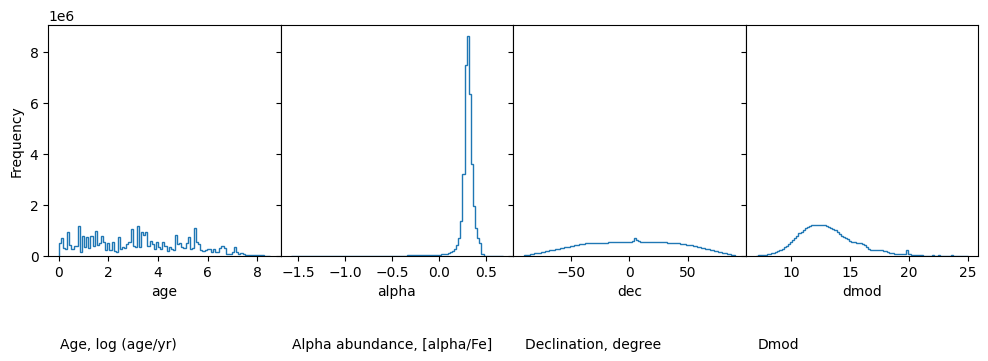

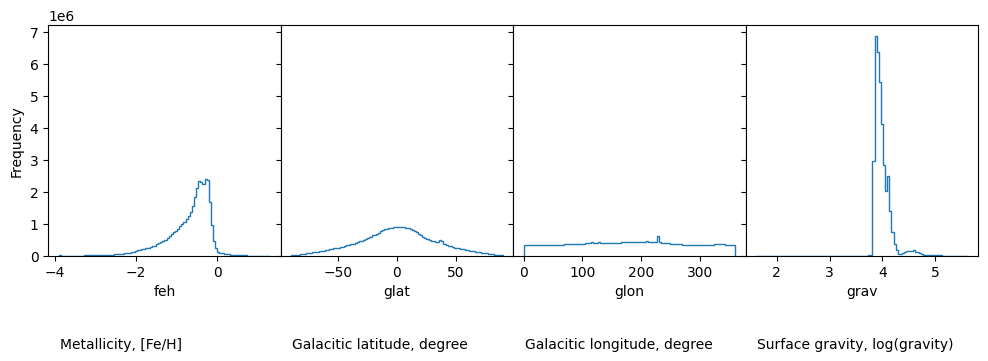

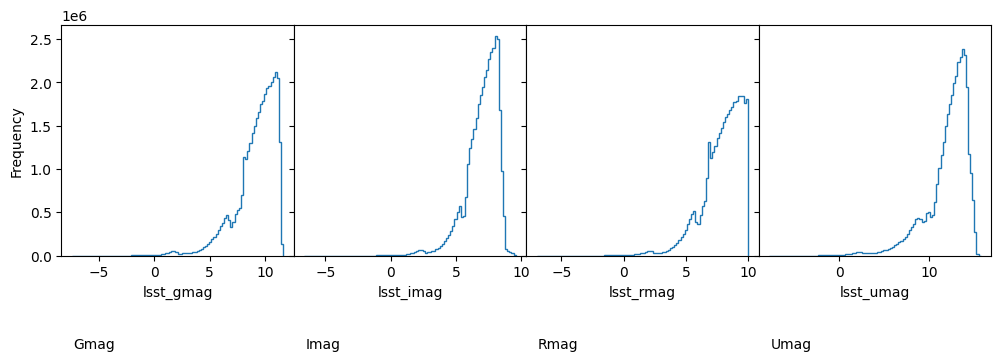

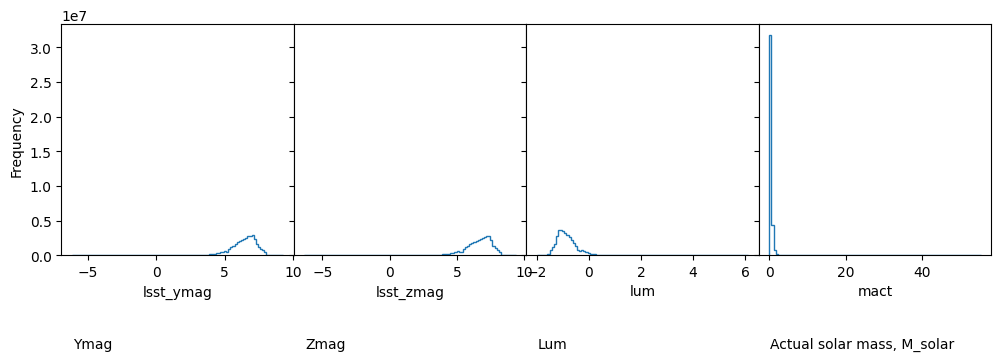

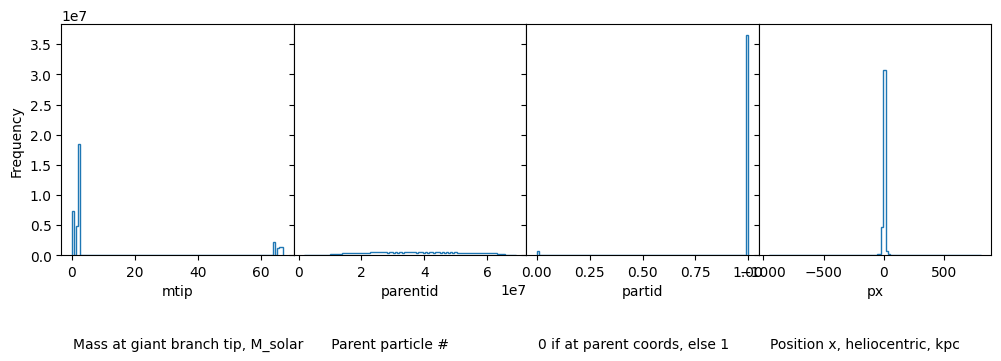

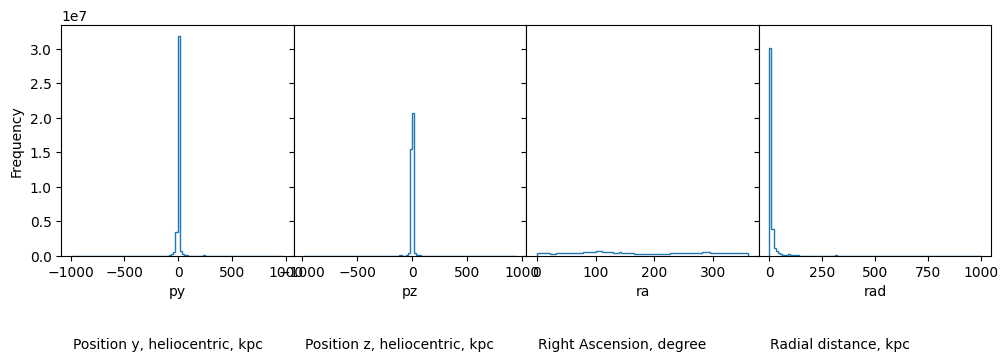

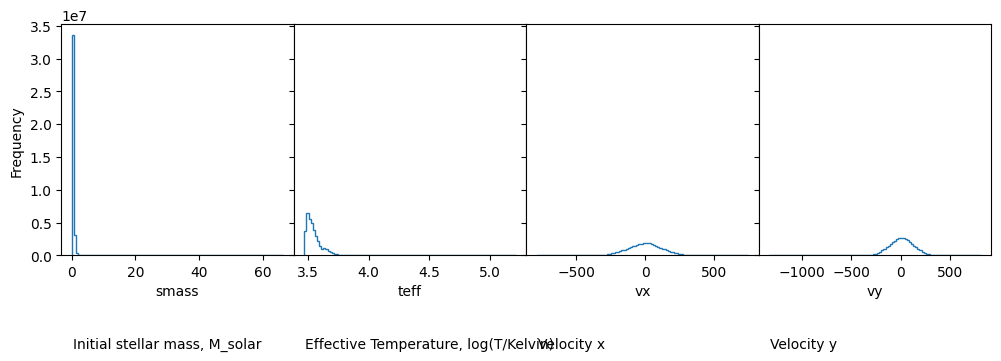

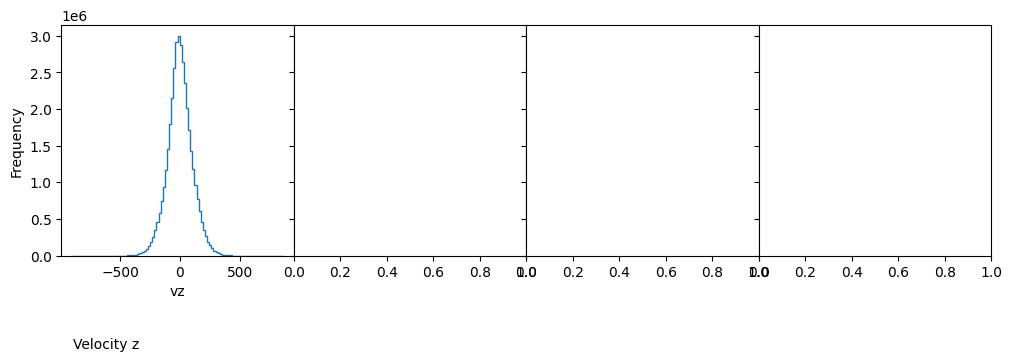

In [54]:
# Declare the number of graphs to plot based on the number of columns in the survey
n_cols = len(column_names)

# Declare how many graphs to plot in each subplot
n_subplots = 4  

# Loop over the columns and create a histogram for each one
for i, col in enumerate(column_names):
    # Check if a new subplot must be created
    if i % n_subplots == 0:
        # Create a new subplot 
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), sharey=True)
    
    # Calculate the current placement of the plot in the subplot
    col_index = i % n_subplots
    
    # Create histogram 
    axes[col_index].hist(df[col].values, bins = 100, histtype='step')
    
    # Add lablels
    axes[col_index].set_xlabel(col)
    if (i % n_subplots) == 0:
        axes[col_index].set_ylabel("Frequency")
    else:
        axes[col_index].set_ylabel(None)
    
    # Add descriptions
    if i < len(descriptions):
        axes[col_index].text(0.05, -0.4, descriptions[i], transform=axes[col_index].transAxes)
    else:
        axes[col_index].text(0.05, -0.4, 'No description available', transform=axes[col_index].transAxes)
        
    # Adjust the spacing between subplots
    fig.subplots_adjust(wspace=0)


### Graph Position

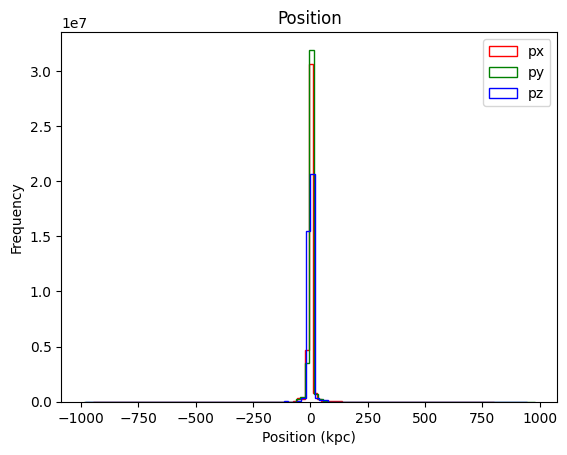

In [33]:
# Define the column names and colors
column_names = ['px', 'py', 'pz']
colors = ['red', 'green', 'blue']

# Create the histogram
fig, ax = plt.subplots()
for col, color in zip(column_names, colors):
    ax.hist(df[col], bins=100, histtype='step', color=color, label=col)

# Add legend, labels, and title
ax.legend()
ax.set_xlabel('Position (kpc)')
ax.set_ylabel('Frequency')
plt.title('Position')

plt.show()

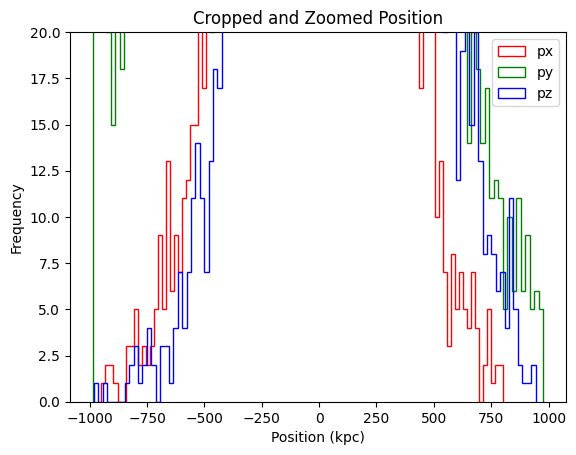

In [34]:
# Zoom in on central distribution to further explore low frequency values

# Create the histogram
fig, ax = plt.subplots()
for col, color in zip(column_names, colors):
    ax.hist(df[col], bins=100, histtype='step', color=color, label=col)

# Add legend, labels, and title
ax.legend()
ax.set_xlabel('Position (kpc)')
ax.set_ylabel('Frequency')
plt.title('Cropped and Zoomed Position')

# Limit values
plt.ylim([0,20])

plt.show()

### Graph Magnitudes

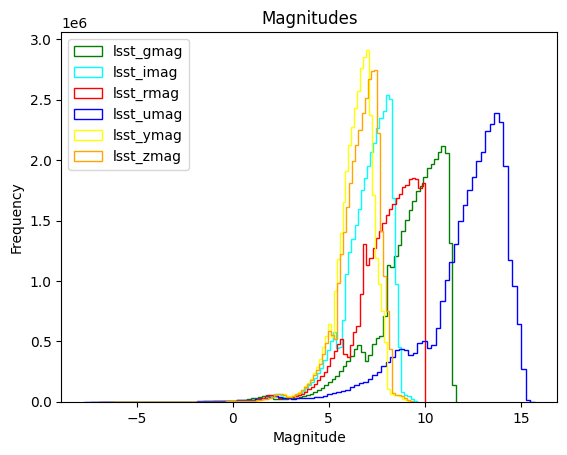

In [35]:
# Plot Magnitudes

# Define the column names and colors
column_names = ['lsst_gmag', 'lsst_imag', 'lsst_rmag', 'lsst_umag', 'lsst_ymag', 'lsst_zmag']
colors = ['green','cyan','red','blue','yellow','orange'] # May be inacurrate 

# Create the histogram
fig, ax = plt.subplots()
for col, color in zip(column_names, colors):
    ax.hist(df[col], bins=100, histtype='step', color=color, label=col)

# Add legend, labels, and title
ax.legend()
ax.set_xlabel('Magnitude')
ax.set_ylabel('Frequency')
plt.title('Magnitudes')

plt.show()

### Graph RA DEC

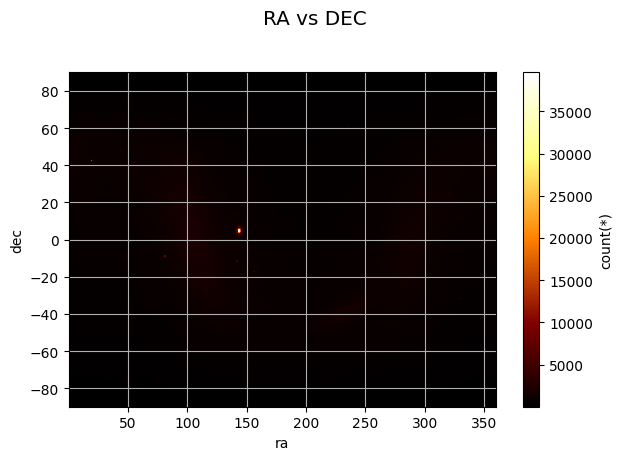

In [36]:
# Plot RA vs DEC with a heatmap
# df.plot(x='ra', y='dec', title='RA vs DEC')
df.viz.heatmap(x='ra', y='dec', title='RA vs DEC')
plt.grid(True)
plt.show()

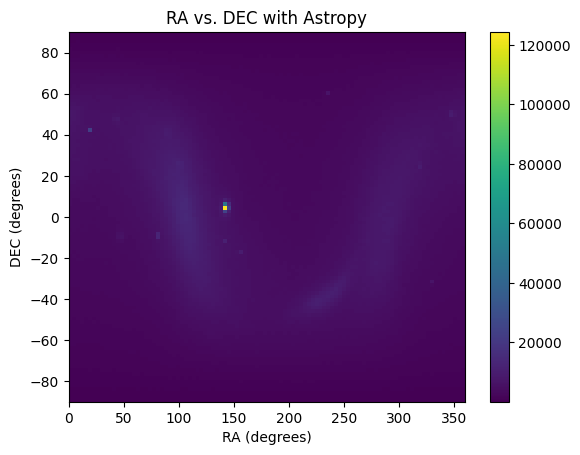

In [37]:
# Plot RA DEC with astropy
from astropy.coordinates import SkyCoord

ra_column = df['ra'].values
dec_column = df['dec'].values

coords = SkyCoord(ra=ra_column, dec=dec_column, unit=('deg', 'deg'))

# Extract the RA and DEC values from the SkyCoord object
ra_values = coords.ra.deg
dec_values = coords.dec.deg

# Create 2d histogram plot
plt.hist2d(ra_values, dec_values, bins=100)
plt.colorbar()

# Set labels and title
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.title('RA vs. DEC with Astropy')

# Show the plot
plt.show()

### Graph Galactic Latitude and Longitude

/opt/anaconda3/envs/ananke_env/lib/python3.10/site-packages/vaex/viz/mpl.py:315: UserWarning: `plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.
  warnings.warn('`plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.')


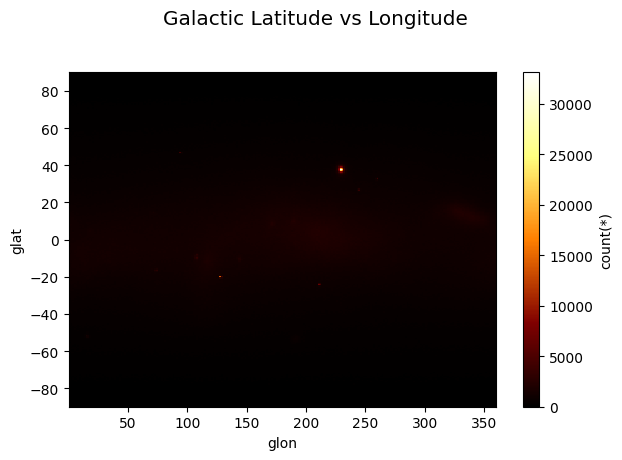

In [38]:
# Plot Galactic Latitude vs Longitude
df.plot(x='glon', y='glat', title='Galactic Latitude vs Longitude')
plt.show()

# Plot lon from -180 to 180
# Combine the lats/long with ra dec since they're on the same scale

### Graph RA and DEC with Galactic Lat Long

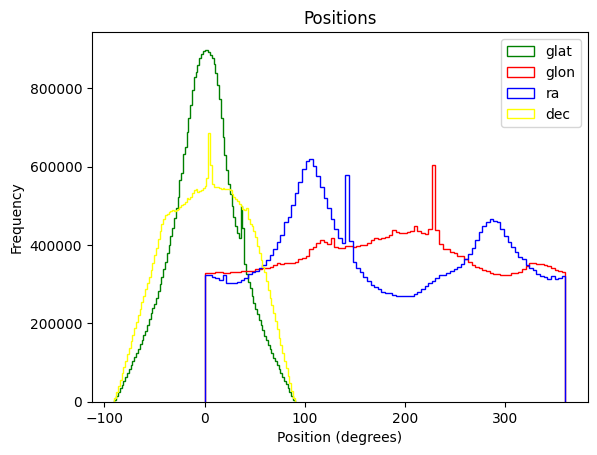

In [39]:
# Define the column names and colors
column_names = ['glat','glon','ra','dec']
colors = ['green','red','blue','yellow']

# Create the histogram
fig, ax = plt.subplots()
for col, color in zip(column_names, colors):
    ax.hist(df[col], bins=100, histtype='step', color=color, label=col)

# Add legend, labels, and title
ax.legend()
ax.set_xlabel('Position (degrees)')
ax.set_ylabel('Frequency')
plt.title('Positions')

plt.show()

### Graph Heliocentric Position in 3D

Currently removed due to large compile time and inability to interact. 

In [40]:
# Plot Heliocentric Position from px py pz
#x = df['px'].values
#y = df['py'].values
#z = df['pz'].values

# Create a 3D plot
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z)
#ax.set_xlabel('X (kpc)')
#ax.set_ylabel('Y (kpc)')
#ax.set_zlabel('X (kpc)')
#ax.set_title('Heliocentric Position')
# Add origin
#ax.scatter([0], [0], [0], color='red', s=100)
#plt.show()

# Find how to interact
# Optimize for time

### Graph Density Profile

Calculate the density from the 'rad' component. 

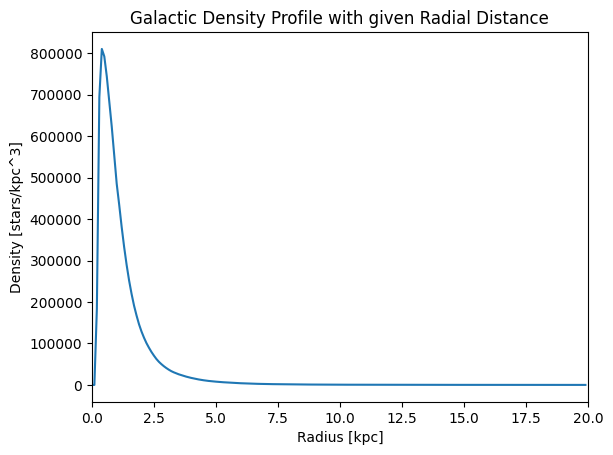

In [41]:
# Plot density (# stars) vs distance (galactic center or heliocenter)

# Define the bin edges
rmin = 0  # minimum radius
rmax = 20  # maximum radius
bins = 200  # number of bins

# Compute the density profile
counts, edges = np.histogram(df['rad'].values, bins=bins, range=(rmin, rmax))
volume = 4.0/3.0 * np.pi * (np.power(edges[1:], 3) - np.power(edges[:-1], 3))
density = counts / volume

# Plot the density profile
fig, ax = plt.subplots()
ax.plot(edges[:-1], density)
ax.set_xlabel('Radius [kpc]')
ax.set_ylabel('Density [stars/kpc^3]')
ax.set_xlim(rmin, rmax)
plt.title('Galactic Density Profile with given Radial Distance')
plt.show()

Calculate the density from the 'px', 'py', and 'pz' components. 

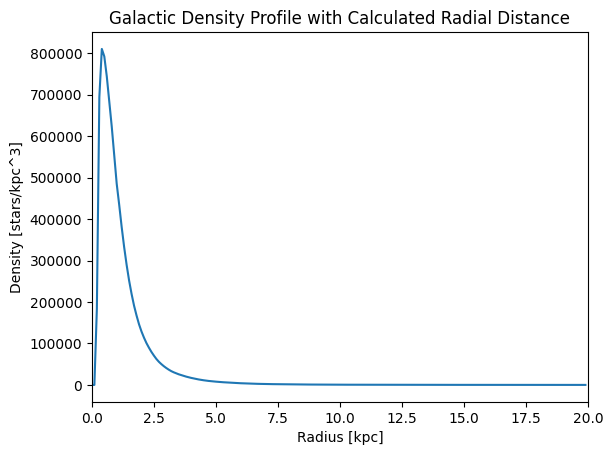

In [43]:
# Plot density (# stars) vs distance (galactic center or heliocenter)

# Define the bin edges
rmin = 0  # minimum radius
rmax = 20  # maximum radius
bins = 200  # number of bins

# Compute radial distance
radial = np.sqrt((df['px'].values)**2 + (df['py'].values)**2 + (df['pz'].values)**2)

# Compute the density profile
counts, edges = np.histogram(radial, bins=bins, range=(rmin, rmax))
volume = 4.0/3.0 * np.pi * (np.power(edges[1:], 3) - np.power(edges[:-1], 3))
density = counts / volume

# Plot the density profile
fig, ax = plt.subplots()
ax.plot(edges[:-1], density)
ax.set_xlabel('Radius [kpc]')
ax.set_ylabel('Density [stars/kpc^3]')
ax.set_xlim(rmin, rmax)
plt.title('Galactic Density Profile with Calculated Radial Distance')
plt.show()

### Velocity Histogram

In [64]:
# Calculate velocity scalar
vr = (df['vx'].values**2 + df['vy'].values**2 + df['vz'].values**2)**0.5

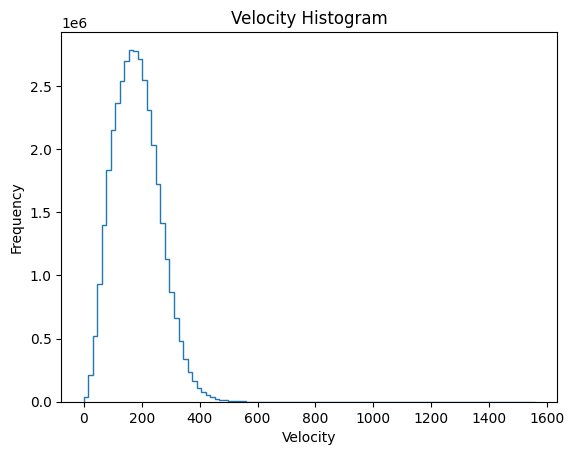

In [65]:
# Create velocity histogram
fig, ax = plt.subplots()
ax.hist(vr, bins=100, histtype='step')
ax.set_xlabel('Velocity')
ax.set_ylabel('Frequency')
plt.title('Velocity Histogram')

plt.show()

### Velocity Dispersion Profile

In [78]:
# Define the bin edges
rmin = 0  # minimum radius
rmax = 200  # maximum radius
bins = 200  # number of bins

In [79]:
# Declare function to calculate mean velocity
def mean(r, v, n_bins, rmax):
    dr = np.linspace(0, rmax, n_bins)
    vel_dr = np.zeros(len(dr)-1)
    for i in range(len(dr)-1):
        index = np.where((r<dr[i+1]) & (r>dr[i]))
        vel_dr[i] = np.mean(v[index])
    return dr, vel_dr

In [80]:
# Calculate position scalar
r =  (df['px'].values**2 + df['py'].values**2 + df['pz'].values**2)**0.5

In [83]:
# Find mean velocity distribution
shellRadius, shellVelocity = mean(r, vr, n_bins=bins, rmax=rmax)

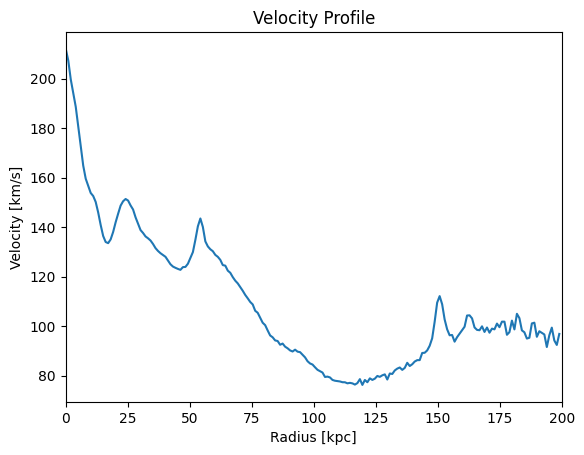

In [84]:
# Compare velocity profiles
fig, ax = plt.subplots()
ax.plot(shellRadius[:-1], shellVelocity)
ax.set_xlabel('Radius [kpc]')
ax.set_ylabel('Velocity [km/s]')
ax.set_xlim(rmin, rmax)
plt.title('Velocity Profile')
plt.show()

### Galactic Distribution from Survey

In [112]:
# Like gas/star distribution
# Use galactic coords
# Cuts in distances 
# 2d histogram of density of stars
# bin from 20 kpcs to 300 kpcs

In [113]:
# Define the bin edges
rmin = 20  # minimum radius
rmax = 300  # maximum radius
bins = 200  # number of bins

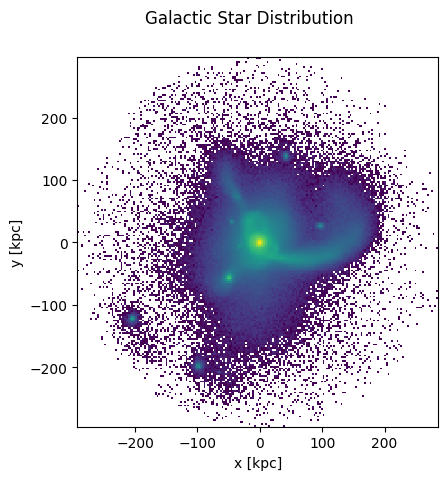

In [114]:
# This is distance to the center of the central galaxy
distance_to_center = (df['px'].values**2 + df['py'].values**2 + df['pz'].values**2)**0.5

# Define boundaries
is_in_galaxy = distance_to_center < rmax

# Plot the logarithmically normalized count of the gas particles at each coordinate
fig = plt.figure()
ax = plt.gca()

# Use 2-D histogram
ax.hist2d(
    df['px'].values[is_in_galaxy],
    df['py'].values[is_in_galaxy],
    bins = bins,
    norm = matplotlib.colors.LogNorm(),
)

# Add labels, aspect ration, and title
ax.set_xlabel( r'x [kpc]' )
ax.set_ylabel( r'y [kpc]' )
ax.set_aspect( 'equal' )
fig.suptitle("Galactic Star Distribution");

### Compare to FIRE distribution

In [118]:
# These are coordinates relative to the central galaxy
coordinates = part['star'].prop( 'host.distance' )

# This is distance to the center of the central galaxy
distance_to_center = part['star'].prop( 'host.distance.total' )

# An approximate definition for being in the galaxy: particles within 10 kpc of the center
is_in_galaxy = distance_to_center < rmax

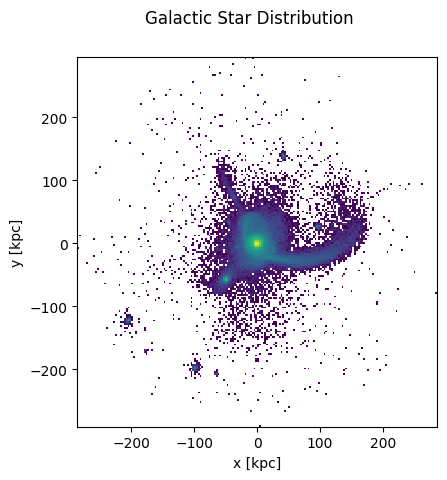

In [119]:
# Plot the logarithmically normalized count of the gas particles at each coordinate
fig = plt.figure()
ax = plt.gca()

# Use 2-D histogram
ax.hist2d(
    coordinates[:,0][is_in_galaxy],
    coordinates[:,1][is_in_galaxy],
    bins = bins,
    norm = matplotlib.colors.LogNorm(),
)

# Add labels, aspect ration, and title
ax.set_xlabel( r'x [kpc]' )
ax.set_ylabel( r'y [kpc]' )
ax.set_aspect( 'equal' )
fig.suptitle("Galactic Star Distribution");

### Galactic Coordinates from Survey

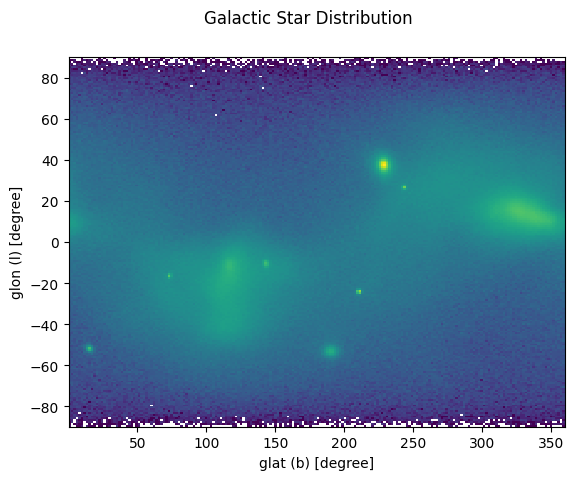

In [125]:
# This is distance to the center of the central galaxy
distance_to_center = (df['px'].values**2 + df['py'].values**2 + df['pz'].values**2)**0.5

# An approximate definition for being in the galaxy: particles within 10 kpc of the center
is_in_galaxy = (distance_to_center < rmax) & (distance_to_center > rmin)

# Plot the logarithmically normalized count of the gas particles at each coordinate
fig = plt.figure()
ax = plt.gca()

# Use 2-D histogram
ax.hist2d(
    df['glon'].values[is_in_galaxy],
    df['glat'].values[is_in_galaxy],
    bins = bins,
    norm = matplotlib.colors.LogNorm(),
)

# Add labels, aspect ration, and title
ax.set_ylabel( 'glon (l) [degree]' )
ax.set_xlabel( 'glat (b) [degree]' )
#ax.set_aspect( 'equal' )
fig.suptitle("Galactic Star Distribution");

### Compare to Mollwiede Plot

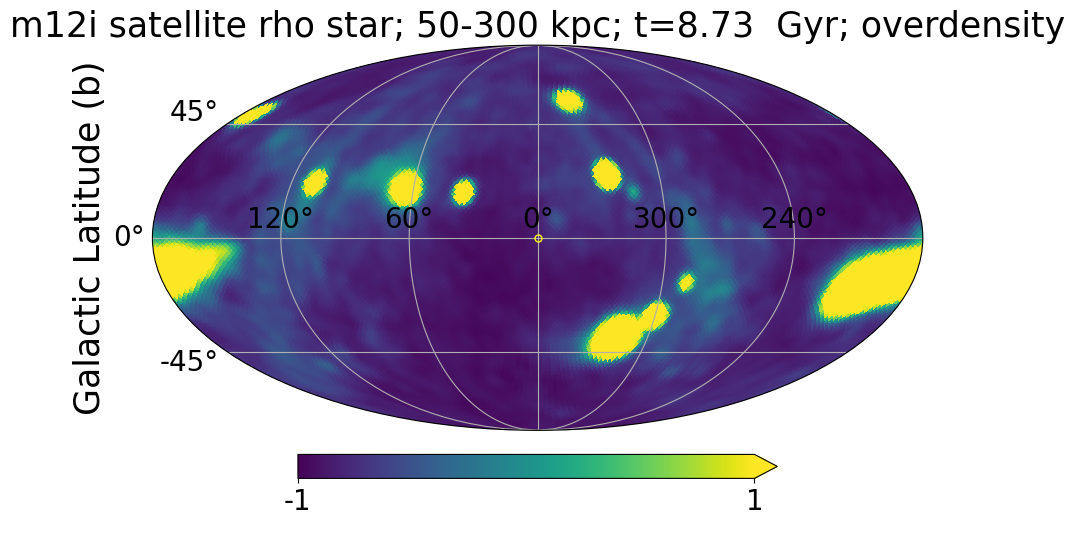

In [123]:
# Specify the directory path of the image
image_path = '/Users/andreweden/Desktop/ANANKE/Flatiron Institute/fire_map/cosmo_tools/m12i_rho_star_faceon_382_overdensity.png'

# Open the image
image = Image.open(image_path)

# Display the image inline
display(image)

# Additional Notes and To Do items

To Do:
* Fix density profile inaccuracy (check glat and glon constraints, check kernels)
* Fix RA/DEC and Glat/Glon graphs
* Fix density graphs having an outlier saturating results

Notes:
* We are focussing on stellar halo so no extinction is fine
* Will have to limit the latitude and distance so that we only deal with halo stars